In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
import regex as re
from sklearn.decomposition import PCA
seed = 42

import warnings
warnings.filterwarnings('ignore')

#### Data Exploration

In [2]:
df_train = pd.read_csv("laptops_train.csv")
df_train.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,10303160.40
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00


In [3]:
df_test = pd.read_csv("laptops_test.csv")
df_test.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0
5,Fujitsu,LifeBook A556,Notebook,"15.6""",1366x768,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows,10,2.3kg,5770908.0
6,Toshiba,Tecra A40-C-1KF,Notebook,"14.0""",1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows,10,1.75kg,8136180.0
7,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon R5 M430,Windows,10,2.25kg,5326308.0
8,HP,Probook 450,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,7166952.0
9,Lenovo,Legion Y520-15IKBN,Gaming,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.5kg,10572588.0


In [4]:
df_train.shape

(977, 13)

In [5]:
df_test.shape

(325, 13)

In [6]:
df = df_train.append(df_test)

df_train, df_test = train_test_split(df, test_size = 0.25)

print(df_train.shape, df_test.shape)

df_train.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

(976, 13) (326, 13)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              976 non-null    object 
 1   Model Name                976 non-null    object 
 2   Category                  976 non-null    object 
 3   Screen Size               976 non-null    object 
 4   Screen                    976 non-null    object 
 5   CPU                       976 non-null    object 
 6   RAM                       976 non-null    object 
 7    Storage                  976 non-null    object 
 8   GPU                       976 non-null    object 
 9   Operating System          976 non-null    object 
 10  Operating System Version  839 non-null    object 
 11  Weight                    976 non-null    object 
 12  Price                     976 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.2+ KB


In [8]:
df_train.describe()

,Price
count,9.760000e+02
mean,9.937616e+06
std,6.192869e+06
min,1.547208e+06
25%,5.348316e+06
50%,8.705268e+06
75%,1.313793e+07
max,5.423231e+07


#### Data Cleaning

In [9]:
df_train = df_train.rename(columns = str.lower)
df_test = df_test.rename(columns = str.lower)

In [10]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', ' storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price'],
      dtype='object')

In [11]:
df_train.isnull().sum()

manufacturer                  0
model name                    0
category                      0
screen size                   0
screen                        0
cpu                           0
ram                           0
 storage                      0
gpu                           0
operating system              0
operating system version    137
weight                        0
price                         0
dtype: int64

#### Check for Dupicates

In [12]:
df_train[df_train.duplicated()]

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price
207,Asus,ZenBook UX305CA-UBM1,Ultrabook,"13.3""",IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows,10,1.2kg,6482268.00
230,Lenovo,IdeaPad Y700-15ISK,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2.6kg,7993908.00
265,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows,10,2.2kg,6405085.44
303,HP,Pavilion 15-AW003nv,Notebook,"15.6""",Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1TB Hybrid,AMD Radeon R7 M440,Windows,10,2.04kg,4890511.08
337,HP,Stream 11-Y000na,Netbook,"11.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows,10,1.17kg,1858428.00
433,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.00
472,Asus,ZenBook UX305CA-UBM1,Ultrabook,"13.3""",IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows,10,1.2kg,6482268.00
536,Acer,Aspire ES1-531,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,NaN,2.4kg,2569788.00
564,Dell,Inspiron 3552,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows,10,2.20kg,3370068.00
720,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.00


#### Data Cleaning and Feature Engineering

In [13]:
# Screen Resolution
df_train["screen"]

0                        IPS Panel Full HD 1920x1080
1                                  Full HD 1920x1080
2      IPS Panel 4K Ultra HD / Touchscreen 3840x2160
3                        IPS Panel Full HD 1920x1080
4                    Full HD / Touchscreen 1920x1080
                           ...                      
971                                         1366x768
972                                         1366x768
973                                         1366x768
974                                         1366x768
975                                         1366x768
Name: screen, Length: 976, dtype: object

Feature Engineering on Screen Resolution

In [14]:
df_train["resolution"] = df_train["screen"].str.extract(r'(\d+x\d+)')
df_test["resolution"] = df_test["screen"].str.extract(r'(\d+x\d+)')

In [15]:
df_train["screen_type"] = df_train["screen"].replace(r'(\d+x\d+)', '', regex = True)
df_test["screen_type"] = df_test["screen"].replace(r'(\d+x\d+)', '', regex = True)

In [16]:
df_train["screen_type"] = df_train["screen_type"].replace(r'(Full HD|Quad HD|\+|/|4K Ultra HD)','',regex = True)
df_test["screen_type"] = df_test["screen_type"].replace(r'(Full HD|Quad HD|\+|/|4K Ultra HD)','',regex = True)

In [17]:
df_train["screen_type"]

0                   IPS Panel  
1                              
2      IPS Panel   Touchscreen 
3                   IPS Panel  
4                  Touchscreen 
                 ...           
971                            
972                            
973                            
974                            
975                            
Name: screen_type, Length: 976, dtype: object

In [18]:
# Extract the information about the presence of touchscreen or not
df_train["touchscreen"] = df_train["screen_type"].str.extract(r'(Touchscreen)')
df_train["screen_type"] = df_train["screen_type"].replace(r'(Touchscreen)','',regex = True)

df_test["touchscreen"] = df_test["screen_type"].str.extract(r'(Touchscreen)')
df_test["screen_type"] = df_test["screen_type"].replace(r'(Touchscreen)','',regex = True)

In [19]:
df_train['touchscreen'].value_counts()

Touchscreen    146
Name: touchscreen, dtype: int64

In [20]:
df_train["touchscreen"] = df_train["touchscreen"].replace("Touchscreen", 1)
df_train["touchscreen"] = df_train["touchscreen"].replace(np.nan, 0)

df_test["touchscreen"] = df_test["touchscreen"].replace("Touchscreen", 1)
df_test["touchscreen"] = df_test["touchscreen"].replace(np.nan, 0)

In [21]:
df_train["touchscreen"].value_counts()

0.0    830
1.0    146
Name: touchscreen, dtype: int64

In [22]:
df_train["screen_type"].value_counts()

                             408
                             237
IPS Panel                    197
IPS Panel                     58
                              55
IPS Panel Retina Display      13
IPS Panel                      8
Name: screen_type, dtype: int64

In [23]:
df_train["screen_type"] = df_train["screen_type"].replace(r' ','',regex = True)
df_test["screen_type"] = df_test["screen_type"].replace(r' ','',regex = True)

df_train["screen_type"].value_counts()

                         700
IPSPanel                 263
IPSPanelRetinaDisplay     13
Name: screen_type, dtype: int64

In [24]:
# Substitute the blank spaces with 'NaN'
df_train['screen_type'] = df_train['screen_type'].replace(r'^\s*$', np.nan, regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'^\s*$', np.nan, regex = True)

df_train['screen_type'].value_counts()

IPSPanel                 263
IPSPanelRetinaDisplay     13
Name: screen_type, dtype: int64

In [25]:
df_train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Lenovo,ThinkPad T470s,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.32kg,13329108.0,1920x1080,IPSPanel,0.0
1,MSI,Leopard GP72M,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.7kg,11995308.0,1920x1080,NaN,0.0
2,Dell,XPS 13,Ultrabook,"13.3""",IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows,10,1.21kg,14218308.0,3840x2160,IPSPanel,1.0
3,Dell,Inspiron 7577,Gaming,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.65kg,11995308.0,1920x1080,IPSPanel,0.0
4,Lenovo,Flex 5,2 in 1 Convertible,"14.0""",Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,8883108.0,1920x1080,NaN,1.0


In [26]:
# Drop original 'screen' column
df_train = df_train.drop('screen', axis = 1)
df_test = df_test.drop('screen', axis=1)

In [27]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Lenovo,ThinkPad T470s,Ultrabook,"14.0""",Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.32kg,13329108.0,1920x1080,IPSPanel,0.0
1,MSI,Leopard GP72M,Gaming,"17.3""",Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.7kg,11995308.0,1920x1080,NaN,0.0
2,Dell,XPS 13,Ultrabook,"13.3""",Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows,10,1.21kg,14218308.0,3840x2160,IPSPanel,1.0
3,Dell,Inspiron 7577,Gaming,"15.6""",Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.65kg,11995308.0,1920x1080,IPSPanel,0.0
4,Lenovo,Flex 5,2 in 1 Convertible,"14.0""",Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,8883108.0,1920x1080,NaN,1.0


In [28]:
df_train['resolution'].value_counts()

1920x1080    625
1366x768     234
3840x2160     31
3200x1800     23
1600x900      18
2560x1440     16
2560x1600      6
2256x1504      5
2880x1800      3
1440x900       3
1920x1200      3
2400x1600      3
2304x1440      3
2160x1440      2
2736x1824      1
Name: resolution, dtype: int64

In [29]:
df_train['screen_type'].value_counts()

IPSPanel                 263
IPSPanelRetinaDisplay     13
Name: screen_type, dtype: int64

In [30]:
df_train['touchscreen'].value_counts()

0.0    830
1.0    146
Name: touchscreen, dtype: int64

CPU

In [31]:
df_train['cpu']

0                Intel Core i5 7200U 2.5GHz
1               Intel Core i7 7700HQ 2.8GHz
2                Intel Core i5 8250U 1.6GHz
3               Intel Core i7 7700HQ 2.8GHz
4                Intel Core i5 7200U 2.5GHz
                       ...                 
971               AMD A6-Series 9220 2.9GHz
972    Intel Celeron Dual Core N3060 1.6GHz
973              Intel Core i3 7100U 2.4GHz
974              Intel Core i3 7100U 2.4GHz
975    Intel Celeron Dual Core N3350 1.1GHz
Name: cpu, Length: 976, dtype: object

In [32]:
# Extract the CPU frequency into a different column
df_train['cpu_freq'] = df_train['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')
df_test['cpu_freq'] = df_test['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')

In [33]:
# With this regex we can extract both float and int frequencies for the CPU
df_train['cpu_freq'].value_counts()

2.5GHz     209
2.8GHz     126
2.7GHz     123
1.6GHz     104
2.3GHz      62
1.8GHz      62
2.6GHz      55
2GHz        52
1.1GHz      42
2.4GHz      35
2.9GHz      16
2.0GHz      15
3GHz        13
1.2GHz      11
1.5GHz      10
1.44GHz      8
2.2GHz       8
1.3GHz       5
0.9GHz       4
3.6GHz       3
3.1GHz       3
2.50GHz      2
1.9GHz       2
3.2GHz       1
1.92GHz      1
1.60GHz      1
2.70GHz      1
2.1GHz       1
1.0GHz       1
Name: cpu_freq, dtype: int64

In [34]:
df_train['cpu_freq'] = df_train['cpu_freq'].str.replace('GHz', '')
df_train.rename(columns={'cpu_freq':'cpu_freq(GHz)'}, inplace=True)

df_test['cpu_freq'] = df_test['cpu_freq'].str.replace('GHz', '')
df_test.rename(columns={'cpu_freq':'cpu_freq(GHz)'}, inplace=True)

In [35]:
df_train['cpu_freq(GHz)'] = df_train['cpu_freq(GHz)'].astype(float)

In [36]:
# Delete the frequency from the column
df_train['cpu'] = df_train['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)
df_test['cpu'] = df_test['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)

In [37]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Lenovo,ThinkPad T470s,Ultrabook,"14.0""",Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.32kg,13329108.0,1920x1080,IPSPanel,0.0,2.5
1,MSI,Leopard GP72M,Gaming,"17.3""",Intel Core i7 7700HQ,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.7kg,11995308.0,1920x1080,NaN,0.0,2.8
2,Dell,XPS 13,Ultrabook,"13.3""",Intel Core i5 8250U,8GB,128GB SSD,Intel UHD Graphics 620,Windows,10,1.21kg,14218308.0,3840x2160,IPSPanel,1.0,1.6
3,Dell,Inspiron 7577,Gaming,"15.6""",Intel Core i7 7700HQ,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.65kg,11995308.0,1920x1080,IPSPanel,0.0,2.8
4,Lenovo,Flex 5,2 in 1 Convertible,"14.0""",Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,8883108.0,1920x1080,NaN,1.0,2.5


RAM

In [38]:
df_train['ram'] = df_train['ram'].str.replace('GB', '')
df_test['ram'] = df_test['ram'].str.replace('GB', '')

In [39]:
df_train.rename(columns={'ram':'ram(GB)'}, inplace=True)
df_test.rename(columns={'ram':'ram(GB)'}, inplace=True)

In [40]:
df_train['ram(GB)'] = df_train['ram(GB)'].astype(float)
df_test['ram(GB)'] = df_test['ram(GB)'].astype(float)

In [41]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Lenovo,ThinkPad T470s,Ultrabook,"14.0""",Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,Windows,10,1.32kg,13329108.0,1920x1080,IPSPanel,0.0,2.5
1,MSI,Leopard GP72M,Gaming,"17.3""",Intel Core i7 7700HQ,8.0,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.7kg,11995308.0,1920x1080,NaN,0.0,2.8
2,Dell,XPS 13,Ultrabook,"13.3""",Intel Core i5 8250U,8.0,128GB SSD,Intel UHD Graphics 620,Windows,10,1.21kg,14218308.0,3840x2160,IPSPanel,1.0,1.6
3,Dell,Inspiron 7577,Gaming,"15.6""",Intel Core i7 7700HQ,16.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.65kg,11995308.0,1920x1080,IPSPanel,0.0,2.8
4,Lenovo,Flex 5,2 in 1 Convertible,"14.0""",Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,8883108.0,1920x1080,NaN,1.0,2.5


Storage Memory

In [42]:
df_train[' storage']

0                 256GB SSD
1                 256GB SSD
2                 128GB SSD
3      128GB SSD +  1TB HDD
4                 256GB SSD
               ...         
971               500GB HDD
972      16GB Flash Storage
973               500GB HDD
974               256GB SSD
975      32GB Flash Storage
Name:  storage, Length: 976, dtype: object

In [43]:
df_train[' storage'].value_counts()

256GB SSD                  297
1TB HDD                    169
500GB HDD                  101
512GB SSD                   94
128GB SSD +  1TB HDD        73
256GB SSD +  1TB HDD        57
128GB SSD                   53
32GB Flash Storage          29
2TB HDD                     12
1TB SSD                     11
512GB SSD +  1TB HDD        11
64GB Flash Storage          10
256GB SSD +  2TB HDD         8
1TB Hybrid                   8
256GB Flash Storage          7
16GB Flash Storage           6
32GB SSD                     6
16GB SSD                     3
1GB SSD                      2
512GB SSD +  2TB HDD         2
256GB SSD +  256GB SSD       2
128GB SSD +  2TB HDD         2
512GB SSD +  512GB SSD       1
128GB Flash Storage          1
512GB Flash Storage          1
256GB SSD +  500GB HDD       1
512GB SSD +  1TB Hybrid      1
64GB SSD                     1
256GB SSD +  1TB Hybrid      1
1TB SSD +  1TB HDD           1
508GB Hybrid                 1
512GB SSD +  256GB SSD       1
240GB SS

In [44]:
df_train['storage_1'] = df_train[' storage']
df_test['storage_1'] = df_test[' storage']

In [45]:
df_train['storage_1'] = df_train['storage_1'].str.replace('1.0TB', '1TB', regex=True)
df_train['storage_1'] = df_train['storage_1'].str.replace('1TB', '1000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('2TB', '2000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('GB', '')

df_test['storage_1'] = df_test['storage_1'].str.replace('1.0TB', '1TB', regex=True)
df_test['storage_1'] = df_test['storage_1'].str.replace('1TB', '1000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('2TB', '2000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('GB', '')

In [46]:
df_train['storage_1'].value_counts()

256 SSD                   297
1000 HDD                  169
500 HDD                   101
512 SSD                    94
128 SSD +  1000 HDD        73
256 SSD +  1000 HDD        57
128 SSD                    53
32 Flash Storage           29
2000 HDD                   12
1000 SSD                   11
512 SSD +  1000 HDD        11
64 Flash Storage           10
256 SSD +  2000 HDD         8
1000 Hybrid                 8
256 Flash Storage           7
16 Flash Storage            6
32 SSD                      6
16 SSD                      3
1 SSD                       2
512 SSD +  2000 HDD         2
256 SSD +  256 SSD          2
128 SSD +  2000 HDD         2
512 SSD +  512 SSD          1
128 Flash Storage           1
512 Flash Storage           1
256 SSD +  500 HDD          1
512 SSD +  1000 Hybrid      1
64 SSD                      1
256 SSD +  1000 Hybrid      1
1000 SSD +  1000 HDD        1
508 Hybrid                  1
512 SSD +  256 SSD          1
240 SSD                     1
1000 HDD +

In [47]:
df_train['storage_2'] = df_train['storage_1'].str.replace(r' ', '')
df_test['storage_2'] = df_test['storage_1'].str.replace(r' ', '')

df_train['storage_2'].value_counts()

256SSD               297
1000HDD              169
500HDD               101
512SSD                94
128SSD+1000HDD        73
256SSD+1000HDD        57
128SSD                53
32FlashStorage        29
2000HDD               12
1000SSD               11
512SSD+1000HDD        11
64FlashStorage        10
256SSD+2000HDD         8
1000Hybrid             8
256FlashStorage        7
16FlashStorage         6
32SSD                  6
16SSD                  3
1SSD                   2
512SSD+2000HDD         2
256SSD+256SSD          2
128SSD+2000HDD         2
512SSD+512SSD          1
128FlashStorage        1
512FlashStorage        1
256SSD+500HDD          1
512SSD+1000Hybrid      1
64SSD                  1
256SSD+1000Hybrid      1
1000SSD+1000HDD        1
508Hybrid              1
512SSD+256SSD          1
240SSD                 1
1000HDD+1000HDD        1
32HDD                  1
Name: storage_2, dtype: int64

In [48]:
storage_1 = []
storage_2 = []

for i in df_train['storage_2']:
    if len(re.findall(r'\+', i)) == 1:
        # Double drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append(one[1])
    else:
        # Single drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append('NaN')

In [49]:
s1 = []
s2 = []

for i in df_test['storage_2']:
    if len(re.findall(r'\+', i)) == 1:
        # Double drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append(one[1])
    else:
        # Single drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append('NaN')

In [50]:
# Create 2 more lists that will contain memory types
storage_1_type = []
storage_1_gb = []

for i in storage_1:
    storage_1_type.append(re.findall(r'(\D\w+)', i)[0])
    storage_1_gb.append(re.findall(r'(\d+)', i)[0])

In [51]:
s1_type = []
s1_gb = []

for i in s1:
    s1_type.append(re.findall(r'(\D\w+)', i)[0])
    s1_gb.append(re.findall(r'(\d+)', i)[0])

Storage Memory 2

In [52]:
storage_2_type = []
storage_2_gb = []

for i in storage_2:
    if i != 'NaN':
        storage_2_type.append(re.findall(r'(\D\w+)', i)[0])
        storage_2_gb.append(re.findall(r'(\d+)', i)[0])
    else:
        storage_2_type.append('NaN')
        storage_2_gb.append(0)

In [53]:
s2_type = []
s2_gb = []

for i in s2:
    if i != 'NaN':
        s2_type.append(re.findall(r'(\D\w+)', i)[0])
        s2_gb.append(re.findall(r'(\d+)', i)[0])
    else:
        s2_type.append('NaN')
        s2_gb.append(0)

In [54]:
df_train['storage_1_gb'] = storage_1_gb
df_train['storage_1_type'] = storage_1_type
df_train['storage_2_gb'] = storage_2_gb
df_train['storage_2_type'] = storage_2_type

df_test['storage_1_gb'] = s1_gb
df_test['storage_1_type'] = s1_type
df_test['storage_2_gb'] = s2_gb
df_test['storage_2_type'] = s2_type

In [55]:
df_train['storage_1_gb'] = df_train['storage_1_gb'].astype(float)
df_train['storage_2_gb'] = df_train['storage_2_gb'].astype(float)

df_test['storage_1_gb'] = df_test['storage_1_gb'].astype(float)
df_test['storage_2_gb'] = df_test['storage_2_gb'].astype(float)

In [56]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1,storage_2,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Lenovo,ThinkPad T470s,Ultrabook,"14.0""",Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,Windows,10,...,1920x1080,IPSPanel,0.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
1,MSI,Leopard GP72M,Gaming,"17.3""",Intel Core i7 7700HQ,8.0,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows,10,...,1920x1080,NaN,0.0,2.8,256 SSD,256SSD,256.0,SSD,0.0,NaN
2,Dell,XPS 13,Ultrabook,"13.3""",Intel Core i5 8250U,8.0,128GB SSD,Intel UHD Graphics 620,Windows,10,...,3840x2160,IPSPanel,1.0,1.6,128 SSD,128SSD,128.0,SSD,0.0,NaN
3,Dell,Inspiron 7577,Gaming,"15.6""",Intel Core i7 7700HQ,16.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,...,1920x1080,IPSPanel,0.0,2.8,128 SSD + 1000 HDD,128SSD+1000HDD,128.0,SSD,1000.0,HDD
4,Lenovo,Flex 5,2 in 1 Convertible,"14.0""",Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,Windows,10,...,1920x1080,NaN,1.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN


Weight

In [57]:
df_train['weight'].value_counts()

2.2kg     87
2.1kg     44
2.5kg     34
2.4kg     32
2.3kg     27
          ..
3.52kg     1
4.33kg     1
2.03kg     1
1.79kg     1
2.34kg     1
Name: weight, Length: 162, dtype: int64

In [58]:
print(df_train['weight'].str.contains('kg').sum(), df_train.shape[0])

976 976


In [59]:
df_train['weight'] = df_train['weight'].str.replace('kg', '')
df_train['weight'] = df_train['weight'].str.replace('s', '').astype(float)

df_test['weight'] = df_test['weight'].str.replace('kg', '')
df_test['weight'] = df_test['weight'].str.replace('s', '').astype(float)

In [60]:
df_train.rename(columns={'weight':'weight(kg)'}, inplace=True)
df_test.rename(columns={'weight':'weight(kg)'}, inplace=True)

In [61]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1,storage_2,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Lenovo,ThinkPad T470s,Ultrabook,"14.0""",Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,Windows,10,...,1920x1080,IPSPanel,0.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
1,MSI,Leopard GP72M,Gaming,"17.3""",Intel Core i7 7700HQ,8.0,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows,10,...,1920x1080,NaN,0.0,2.8,256 SSD,256SSD,256.0,SSD,0.0,NaN
2,Dell,XPS 13,Ultrabook,"13.3""",Intel Core i5 8250U,8.0,128GB SSD,Intel UHD Graphics 620,Windows,10,...,3840x2160,IPSPanel,1.0,1.6,128 SSD,128SSD,128.0,SSD,0.0,NaN
3,Dell,Inspiron 7577,Gaming,"15.6""",Intel Core i7 7700HQ,16.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,...,1920x1080,IPSPanel,0.0,2.8,128 SSD + 1000 HDD,128SSD+1000HDD,128.0,SSD,1000.0,HDD
4,Lenovo,Flex 5,2 in 1 Convertible,"14.0""",Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,Windows,10,...,1920x1080,NaN,1.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN


CPU & GPU Manufacturing Companies

In [62]:
df_train['cpu_brand'] = df_train['cpu'].str.extract(r'^(\w+)')
df_test['cpu_brand'] = df_test['cpu'].str.extract(r'^(\w+)')

df_train['cpu_brand'].value_counts()

Intel    933
AMD       43
Name: cpu_brand, dtype: int64

In [63]:
df_train['gpu_brand'] = df_train['gpu'].str.extract(r'^(\w+)')
df_test['gpu_brand'] = df_test['gpu'].str.extract(r'^(\w+)')

df_train['gpu_brand'].value_counts()

Intel     541
Nvidia    304
AMD       131
Name: gpu_brand, dtype: int64

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6    storage                  976 non-null    object 
 7   gpu                       976 non-null    object 
 8   operating system          976 non-null    object 
 9   operating system version  839 non-null    object 
 10  weight(kg)                976 non-null    float64
 11  price                     976 non-null    float64
 12  resolution                976 non-null    object 
 13  screen_type               276 non-null    object 
 14  touchscree

In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              326 non-null    object 
 1   model name                326 non-null    object 
 2   category                  326 non-null    object 
 3   screen size               326 non-null    object 
 4   cpu                       326 non-null    object 
 5   ram(GB)                   326 non-null    float64
 6    storage                  326 non-null    object 
 7   gpu                       326 non-null    object 
 8   operating system          326 non-null    object 
 9   operating system version  293 non-null    object 
 10  weight(kg)                326 non-null    float64
 11  price                     326 non-null    float64
 12  resolution                326 non-null    object 
 13  screen_type               89 non-null     object 
 14  touchscree

In [66]:
df_train.drop([' storage', 'storage_1', 'storage_2'], axis=1, inplace=True)
df_test.drop([' storage', 'storage_1', 'storage_2'], axis=1, inplace=True)

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6   gpu                       976 non-null    object 
 7   operating system          976 non-null    object 
 8   operating system version  839 non-null    object 
 9   weight(kg)                976 non-null    float64
 10  price                     976 non-null    float64
 11  resolution                976 non-null    object 
 12  screen_type               276 non-null    object 
 13  touchscreen               976 non-null    float64
 14  cpu_freq(G

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              326 non-null    object 
 1   model name                326 non-null    object 
 2   category                  326 non-null    object 
 3   screen size               326 non-null    object 
 4   cpu                       326 non-null    object 
 5   ram(GB)                   326 non-null    float64
 6   gpu                       326 non-null    object 
 7   operating system          326 non-null    object 
 8   operating system version  293 non-null    object 
 9   weight(kg)                326 non-null    float64
 10  price                     326 non-null    float64
 11  resolution                326 non-null    object 
 12  screen_type               89 non-null     object 
 13  touchscreen               326 non-null    float64
 14  cpu_freq(G

In [69]:
df_train.to_csv('laptop-clean-train.csv', index = False)
df_test.to_csv('laptop-clean-test.csv', index = False)

#### Exploratory Data Analysis - EDA

In [70]:
df1 = pd.read_csv('laptop-clean-train.csv')
df1.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Lenovo,ThinkPad T470s,Ultrabook,"14.0""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.32,...,1920x1080,IPSPanel,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
1,MSI,Leopard GP72M,Gaming,"17.3""",Intel Core i7 7700HQ,8.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.70,...,1920x1080,NaN,0.0,2.8,256.0,SSD,0.0,NaN,Intel,Nvidia
2,Dell,XPS 13,Ultrabook,"13.3""",Intel Core i5 8250U,8.0,Intel UHD Graphics 620,Windows,10,1.21,...,3840x2160,IPSPanel,1.0,1.6,128.0,SSD,0.0,NaN,Intel,Intel
3,Dell,Inspiron 7577,Gaming,"15.6""",Intel Core i7 7700HQ,16.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.65,...,1920x1080,IPSPanel,0.0,2.8,128.0,SSD,1000.0,HDD,Intel,Nvidia
4,Lenovo,Flex 5,2 in 1 Convertible,"14.0""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.70,...,1920x1080,NaN,1.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel


In [71]:
df_clean = df1.copy()

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6   gpu                       976 non-null    object 
 7   operating system          976 non-null    object 
 8   operating system version  839 non-null    object 
 9   weight(kg)                976 non-null    float64
 10  price                     976 non-null    float64
 11  resolution                976 non-null    object 
 12  screen_type               276 non-null    object 
 13  touchscreen               976 non-null    float64
 14  cpu_freq(G

In [74]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (15, 5), gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'darkgreen', label = 'mean=' + str(np.round(df[col].mean(), 1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median=' + str(np.round(df[col].median(), 1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode=' + str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

#### Which Brand is the most frequent in the dataframe?

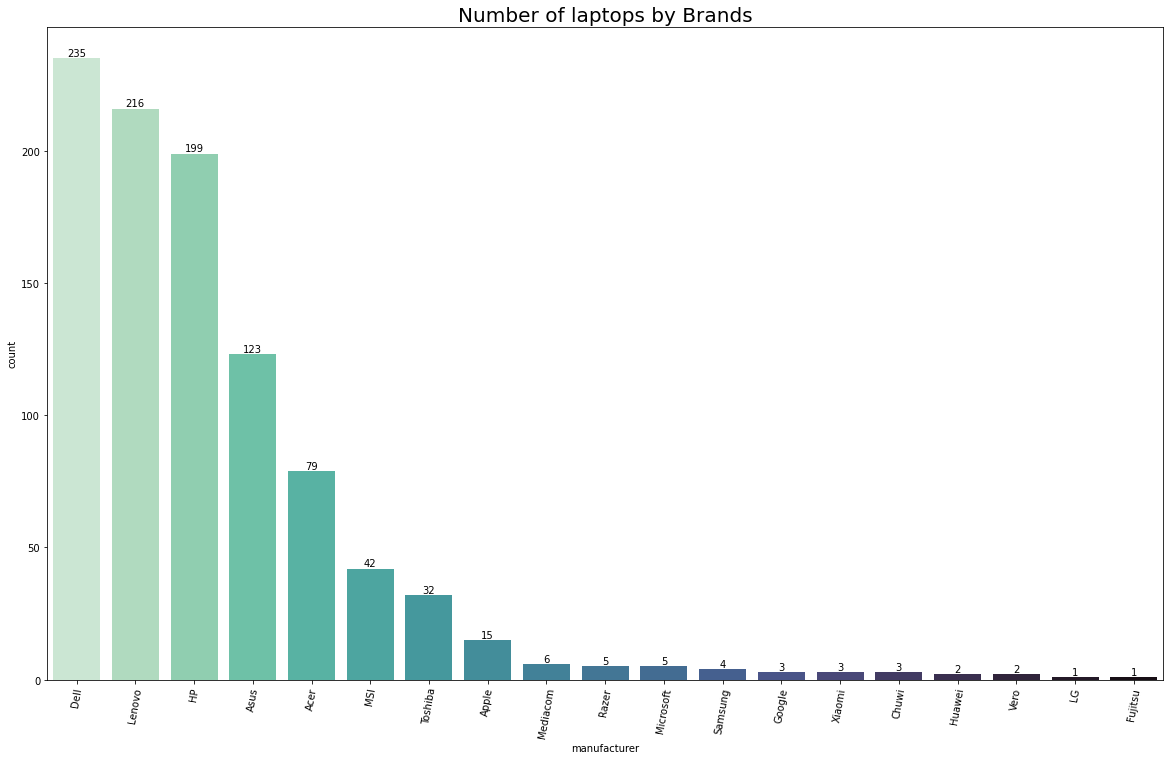

In [78]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'manufacturer', data = df_train, palette= 'mako_r',order = df_train['manufacturer'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by Brands', fontsize = 20)
plt.show()

#### What type of laptop is the most frequent?

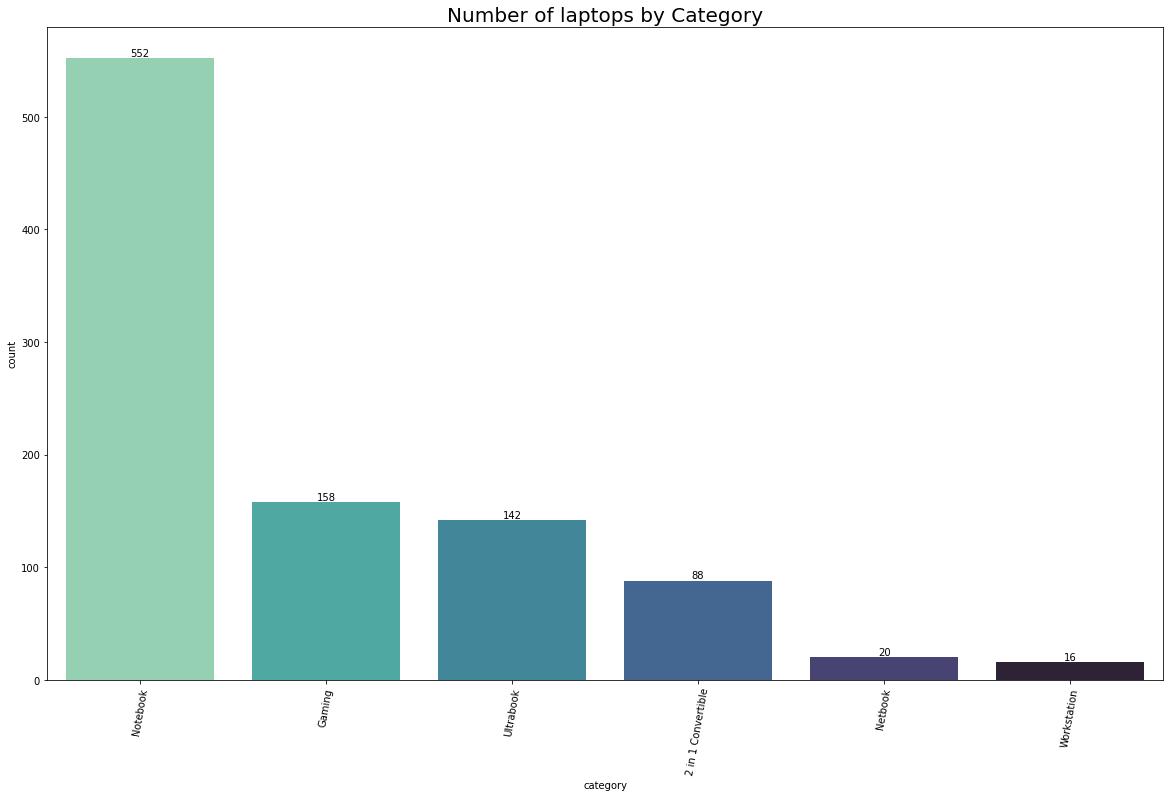

In [79]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'category', data = df_train, palette= 'mako_r',order = df_train['category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by Category', fontsize = 20)
plt.show()

#### Which size is the most popular?

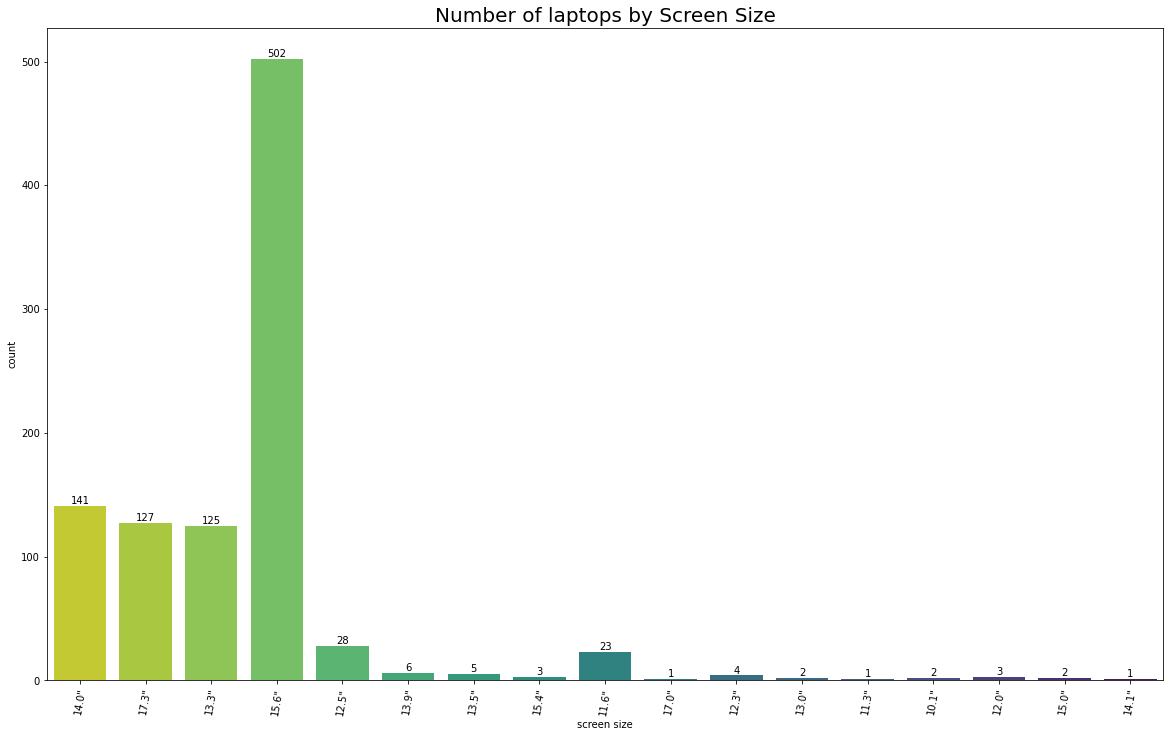

In [82]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'screen size', data = df_train, palette= 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by Screen Size', fontsize = 20)
plt.show()

There are few laptops with some non conventional sizes, which indeed appears in few rows. For this reason, we will only keep laptops with more conventional sizes.

In [83]:
inches_list = df_train['screen size'].value_counts().index[:6].tolist()
inches_list

['15.6"', '14.0"', '17.3"', '13.3"', '12.5"', '11.6"']

We will only keep laptops with these 6 sizes

In [84]:
df_clean = df_clean[df_clean['screen size'].isin(inches_list)]
df_test = df_test[df_test['screen size'].isin(inches_list)]

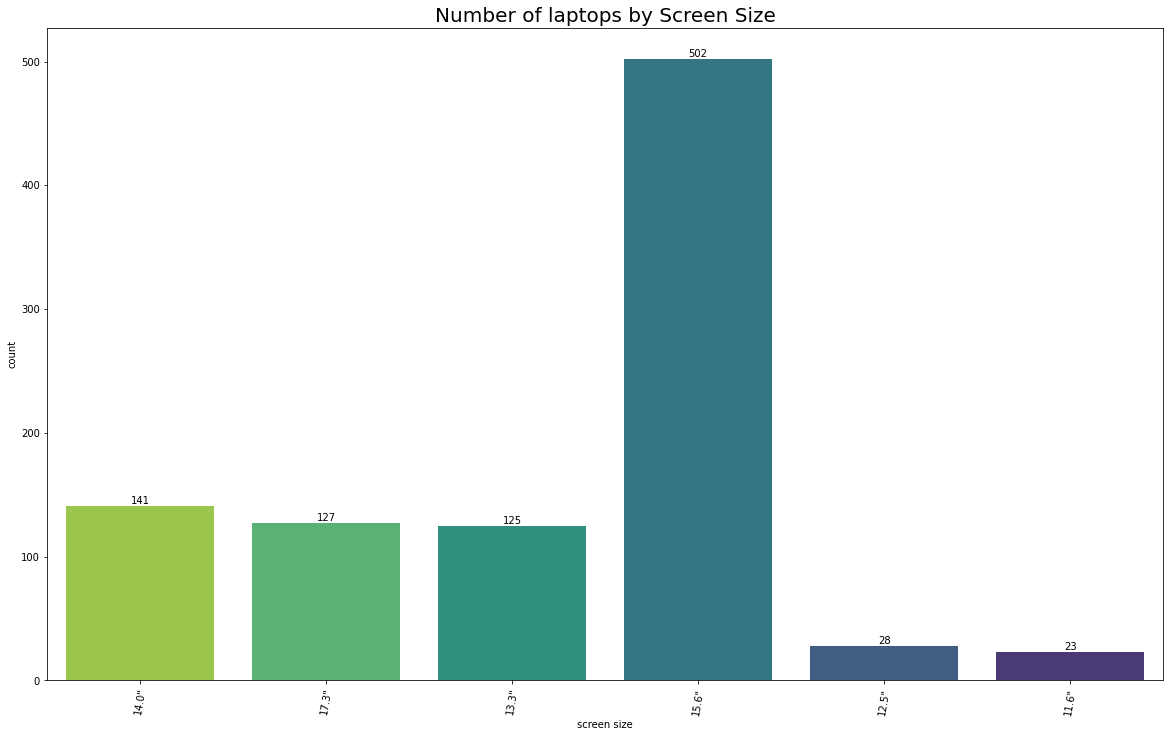

In [85]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'screen size', data = df_clean, palette= 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by Screen Size', fontsize = 20)
plt.show()

In [86]:
print('We removed {} outliers'.format(len(df_train) - len(df_clean)))

We removed 30 outliers


#### How is weight distributed among the laptops?

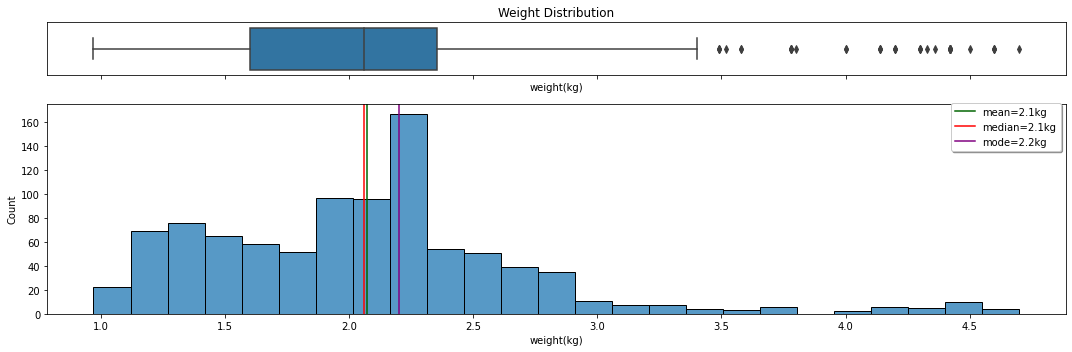

In [87]:
num_plot(df_clean, 'weight(kg)', 'Weight Distribution', 'kg')

#### How is the price distributed among laptops?

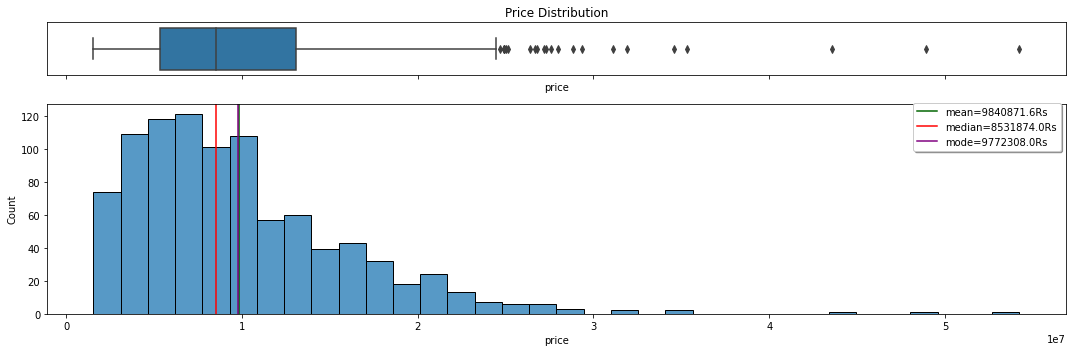

In [88]:
num_plot(df_clean, 'price', 'Price Distribution', 'Rs')

In [89]:
import plotly.express as px
fig = px.box(df_train, y = 'price')
fig.show()

In [90]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

<AxesSubplot:xlabel='category', ylabel='price'>

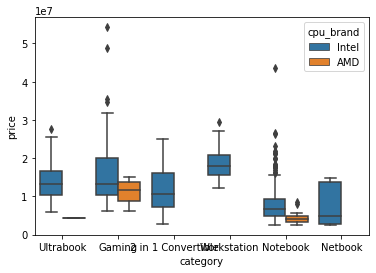

In [93]:
sns.boxplot(x = 'category', y = 'price', data = df_train[df_train['price'] > 2500000], hue = 'cpu_brand')

In [94]:
df_train[df_train['price'] > 2500000]

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Lenovo,ThinkPad T470s,Ultrabook,"14.0""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.32,...,1920x1080,IPSPanel,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
1,MSI,Leopard GP72M,Gaming,"17.3""",Intel Core i7 7700HQ,8.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.70,...,1920x1080,NaN,0.0,2.8,256.0,SSD,0.0,NaN,Intel,Nvidia
2,Dell,XPS 13,Ultrabook,"13.3""",Intel Core i5 8250U,8.0,Intel UHD Graphics 620,Windows,10,1.21,...,3840x2160,IPSPanel,1.0,1.6,128.0,SSD,0.0,NaN,Intel,Intel
3,Dell,Inspiron 7577,Gaming,"15.6""",Intel Core i7 7700HQ,16.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.65,...,1920x1080,IPSPanel,0.0,2.8,128.0,SSD,1000.0,HDD,Intel,Nvidia
4,Lenovo,Flex 5,2 in 1 Convertible,"14.0""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.70,...,1920x1080,NaN,1.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Lenovo,IdeaPad 320-15AST,Notebook,"15.6""",AMD A6-Series 9220,4.0,AMD Radeon R4 Graphics,No OS,NaN,2.20,...,1366x768,NaN,0.0,2.9,500.0,HDD,0.0,NaN,AMD,AMD
972,Asus,Chromebook C202SA,Netbook,"11.6""",Intel Celeron Dual Core N3060,4.0,Intel HD Graphics 400,Chrome OS,NaN,1.20,...,1366x768,NaN,0.0,1.6,16.0,FlashStorage,0.0,NaN,Intel,Intel
973,HP,ProBook 450,Notebook,"15.6""",Intel Core i3 7100U,4.0,Intel HD Graphics 620,Windows,10,2.10,...,1366x768,NaN,0.0,2.4,500.0,HDD,0.0,NaN,Intel,Intel
974,HP,ProBook 450,Notebook,"15.6""",Intel Core i3 7100U,4.0,Intel HD Graphics 620,Windows,10,2.04,...,1366x768,NaN,0.0,2.4,256.0,SSD,0.0,NaN,Intel,Intel


#### How is RAM distributed among laptops?

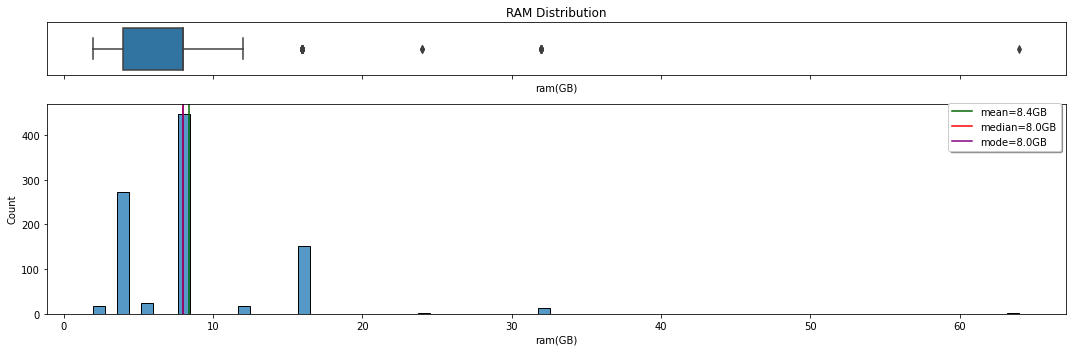

In [95]:
num_plot(df_clean, 'ram(GB)', 'RAM Distribution', 'GB')

#### How is CPU frequency distributed among laptops?

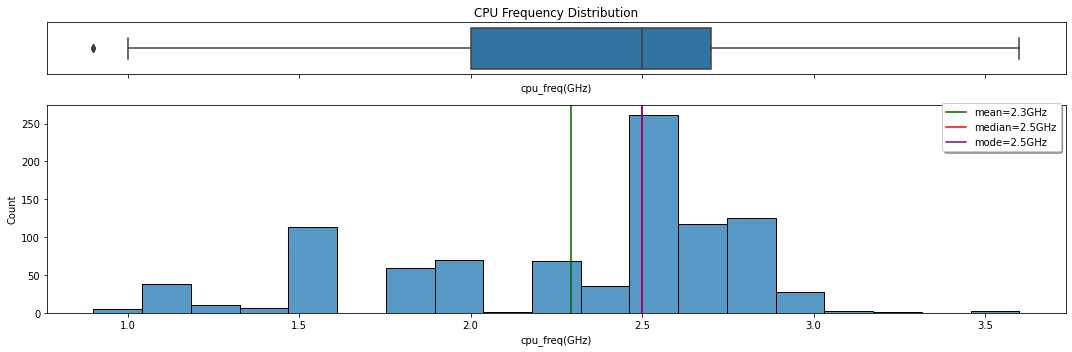

In [96]:
num_plot(df_clean, 'cpu_freq(GHz)', 'CPU Frequency Distribution', 'GHz')

#### How is Hard Drive capacity distributed among laptops?

In [97]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

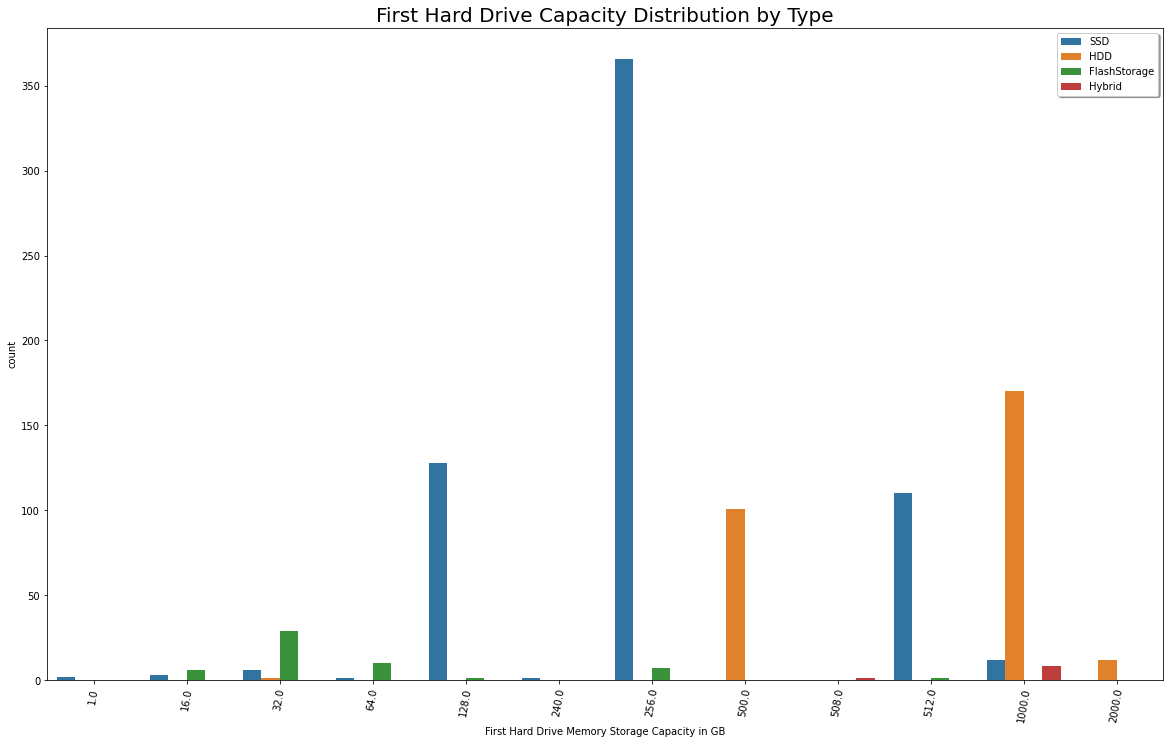

In [98]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'storage_1_gb', data = df_train, hue = 'storage_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('First Hard Drive Memory Storage Capacity in GB')
plt.title('First Hard Drive Capacity Distribution by Type', fontsize = 20)
plt.legend(loc = 'upper right', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

###### The plot shows the distribution of the first hard drive capacity by type. The x-axis represents the first hard drive memory storage capacity in GB, and the y-axis represents the count of laptops with each capacity. 
###### From the plot, we can observe that the majority of laptops have a first hard drive capacity between 0 and 500 GB. There is a significant drop in the count of laptops as the capacity increases beyond 500 GB. 
###### This distribution suggests that most laptops in the dataset have relatively lower storage capacities, with only a few laptops having higher storage capacities.

Second Hard Drive Analysis

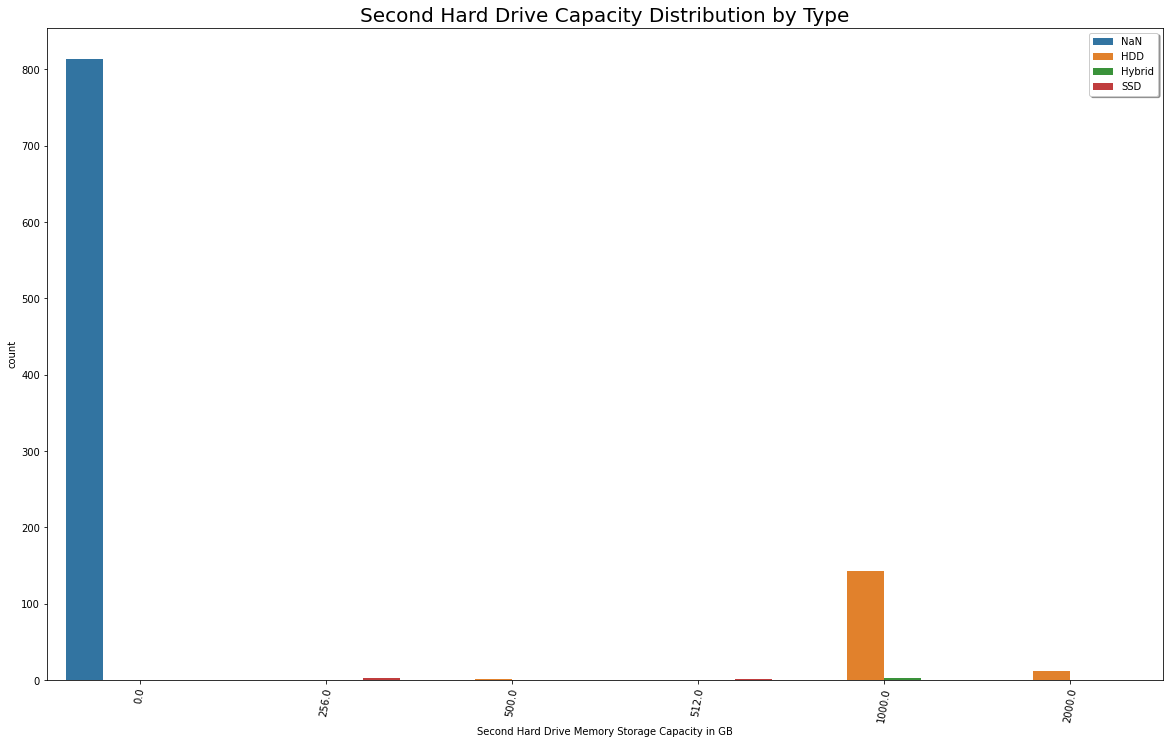

In [107]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'storage_2_gb', data = df_train, hue = 'storage_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('Second Hard Drive Memory Storage Capacity in GB')
plt.title('Second Hard Drive Capacity Distribution by Type', fontsize = 20)
plt.legend(loc = 'upper right', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

#### Multivariate Outliers Detection

Price vs RAM

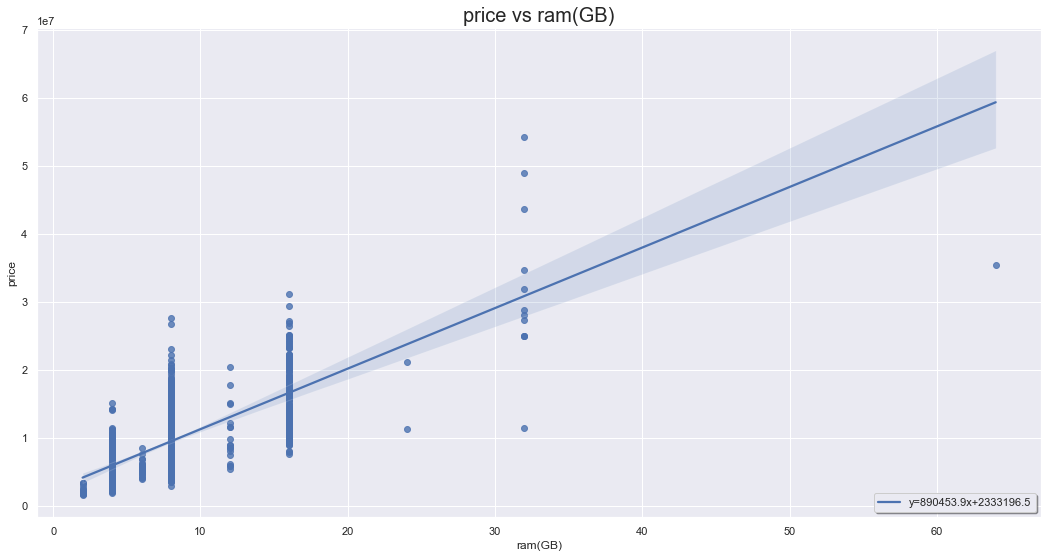

In [114]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r, p, std_err = stats.linregress(df[col_x], df[col_y])
    sns.set_theme()
    plt.figure(figsize = (18, 9))
    sns.regplot(x = col_x, y = col_y, data = df, line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' vs ' + col_x, fontsize = 20)
    plt.show()
    return slope, intercept

slope, intercept = lr_plot(df_clean, 'ram(GB)', 'price', 'lower right')

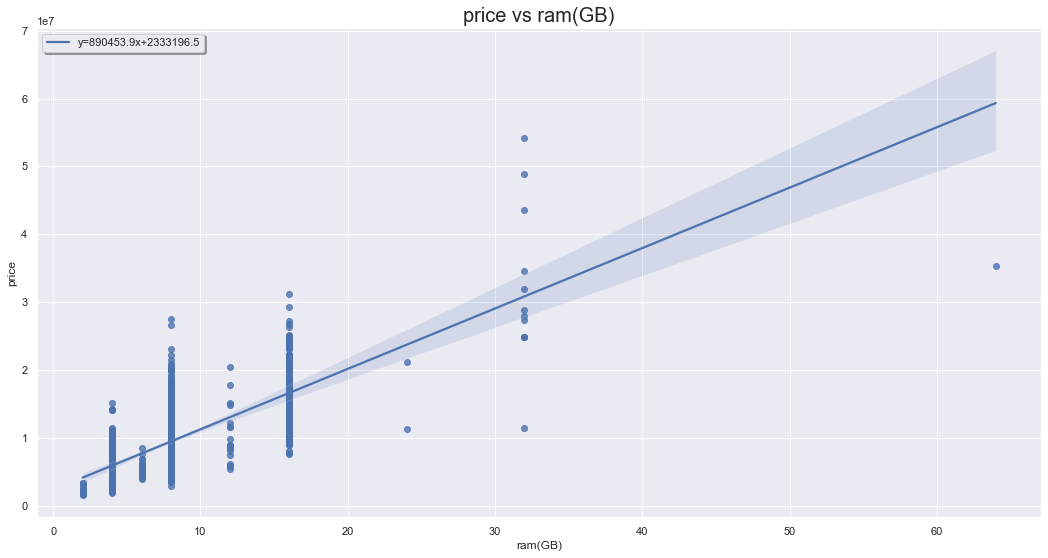

In [115]:
slope, intercept = lr_plot(df_clean, 'ram(GB)', 'price', 'upper left')

###### By removing the outliers, we can see that the price of laptops increases with the increase in RAM capacity. This suggests that laptops with higher RAM capacities tend to be more expensive than laptops with lower RAM capacities.

Price vs CPU Frequency

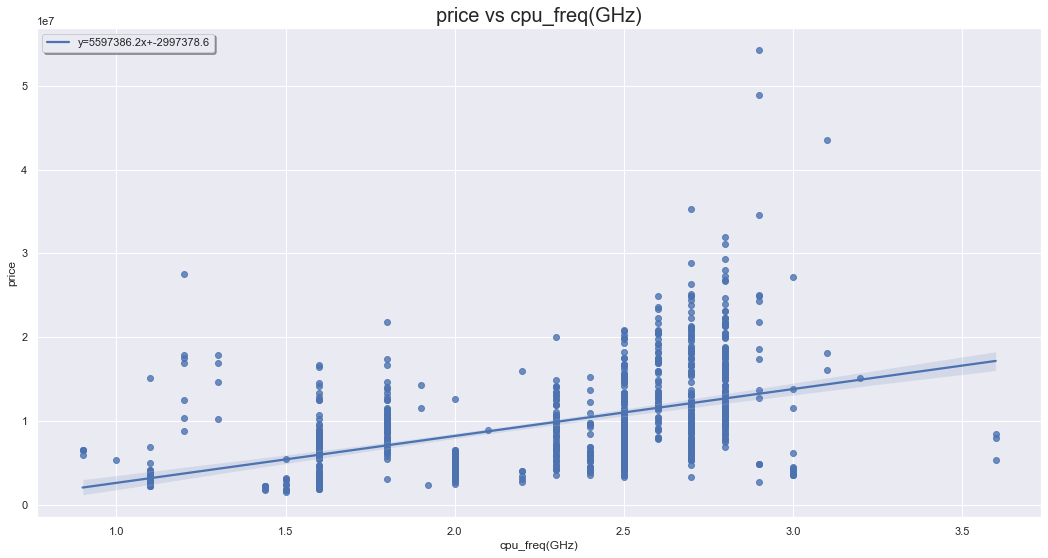

In [116]:
slope, intercept = lr_plot(df_clean, 'cpu_freq(GHz)', 'price', 'upper left')

###### We can see a positive correlation between the price of laptops and the CPU frequency. This suggests that laptops with higher CPU frequencies tend to be more expensive than laptops with lower CPU frequencies. A positive trend between price and CPU frequency, with no outliers, suggests that the price of laptops increases with the increase in CPU frequency.

Price vs Inches

In [117]:
df_clean.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

for i in range(len(df_clean)):
    df_clean['screen size'][i] = re.sub('"', '', df_clean['screen size'][i])

for i in range(len(df_test)):
    df_test['screen size'][i] = re.sub('"', '', df_test['screen size'][i])

df_clean['screen size'] = df_clean['screen size'].astype(float)
df_test['screen size'] = df_test['screen size'].astype(float)

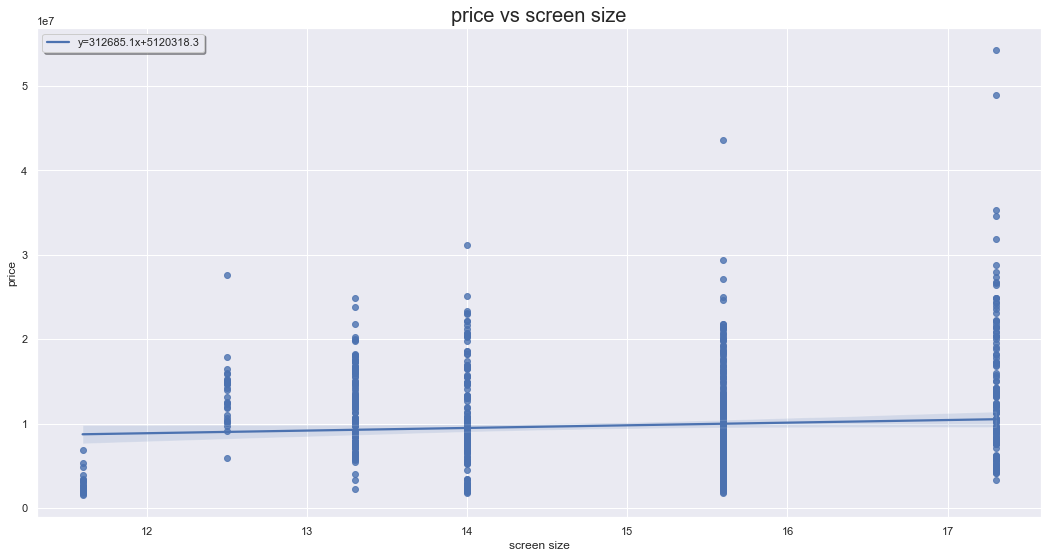

In [118]:
slope, intercept = lr_plot(df_clean, 'screen size', 'price', 'upper left')

###### The regression is almost flat, which suggests that the price of laptops is not significantly affected by the screen size. This indicates that the screen size does not have a strong influence on the price of laptops. PCs with higher screen inches slightly tends to be more expensive

Weight vs Inches

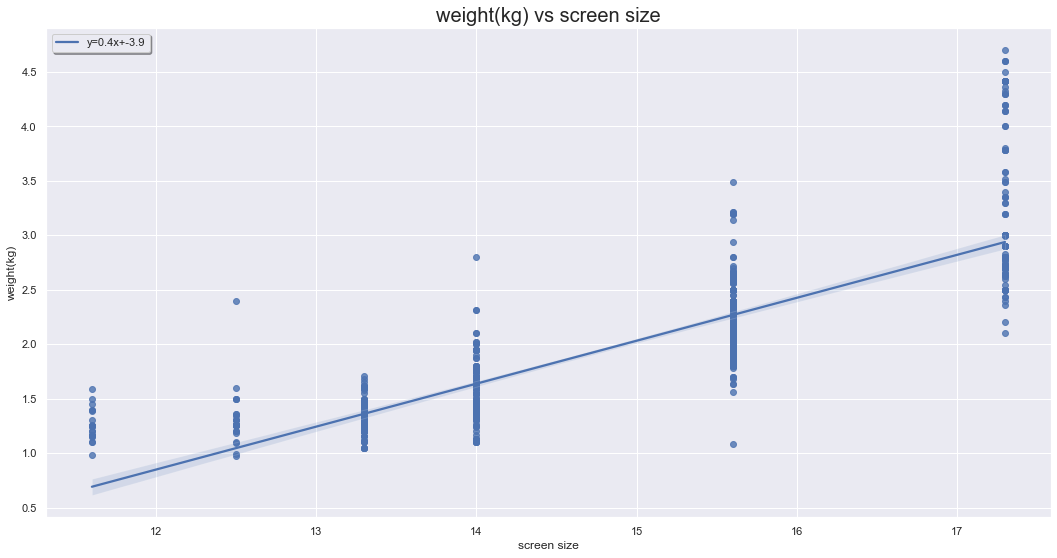

In [119]:
slope, intercept = lr_plot(df_clean, 'screen size', 'weight(kg)', 'upper left')   

###### PCs with bigger screens are heavier. This is a common sense, but it is good to see that the data confirms this. 

#### Price vs CPU Brand by GPU Brand

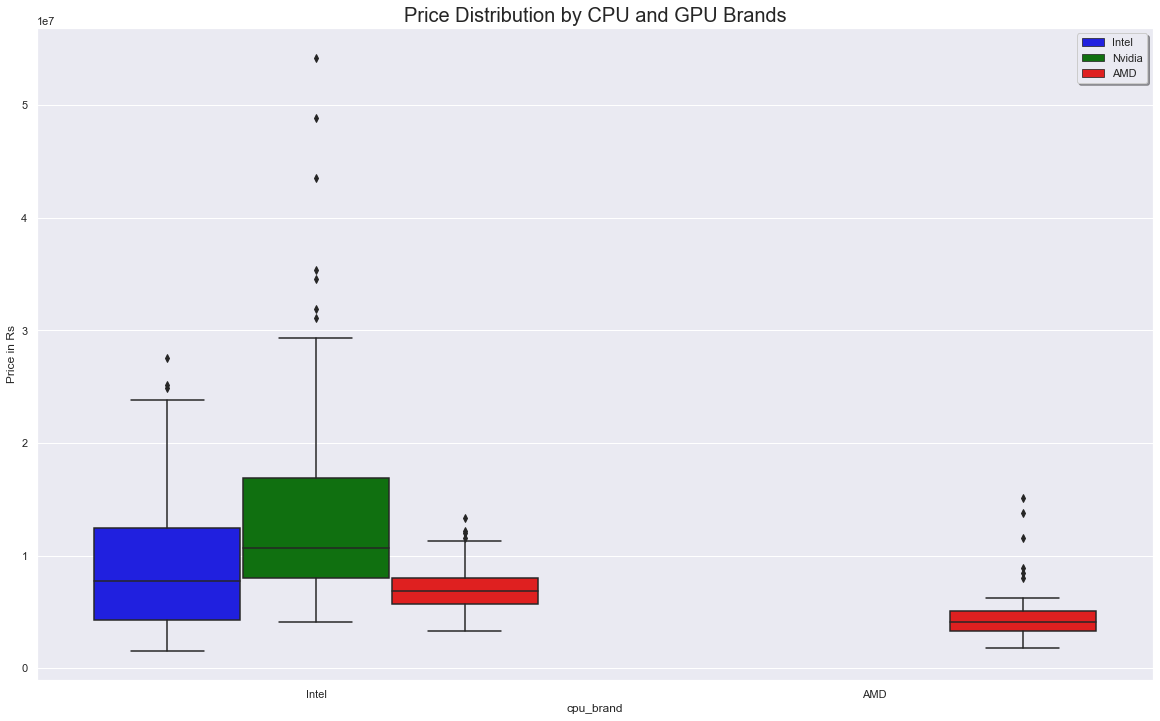

In [120]:
cpu_palette = {'Intel': 'blue', 'AMD': 'red', 'Nvidia':'green'}
fig, ax = plt.subplots(figsize = (20, 12))
sns.boxplot(x = 'cpu_brand', y = 'price', data = df_clean, palette = cpu_palette, hue = 'gpu_brand')
ax.set_title('Price Distribution by CPU and GPU Brands', fontsize = 20)
plt.ylabel('Price in Rs')
plt.legend(loc = 'upper right', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.title('Price Distribution by CPU and GPU Brands', fontsize = 20)
plt.show()

* Intel CPUs are more expensive than AMD CPUs
* Nvidia GPUs are more expensive than AMD GPUs
* Laptops with Intel CPUs and Nvidia GPUs are the most expensive

#### Which are the top 15 most common GPUs?

In [121]:
gpu_list = df_clean['gpu'].value_counts().index[:15].tolist()

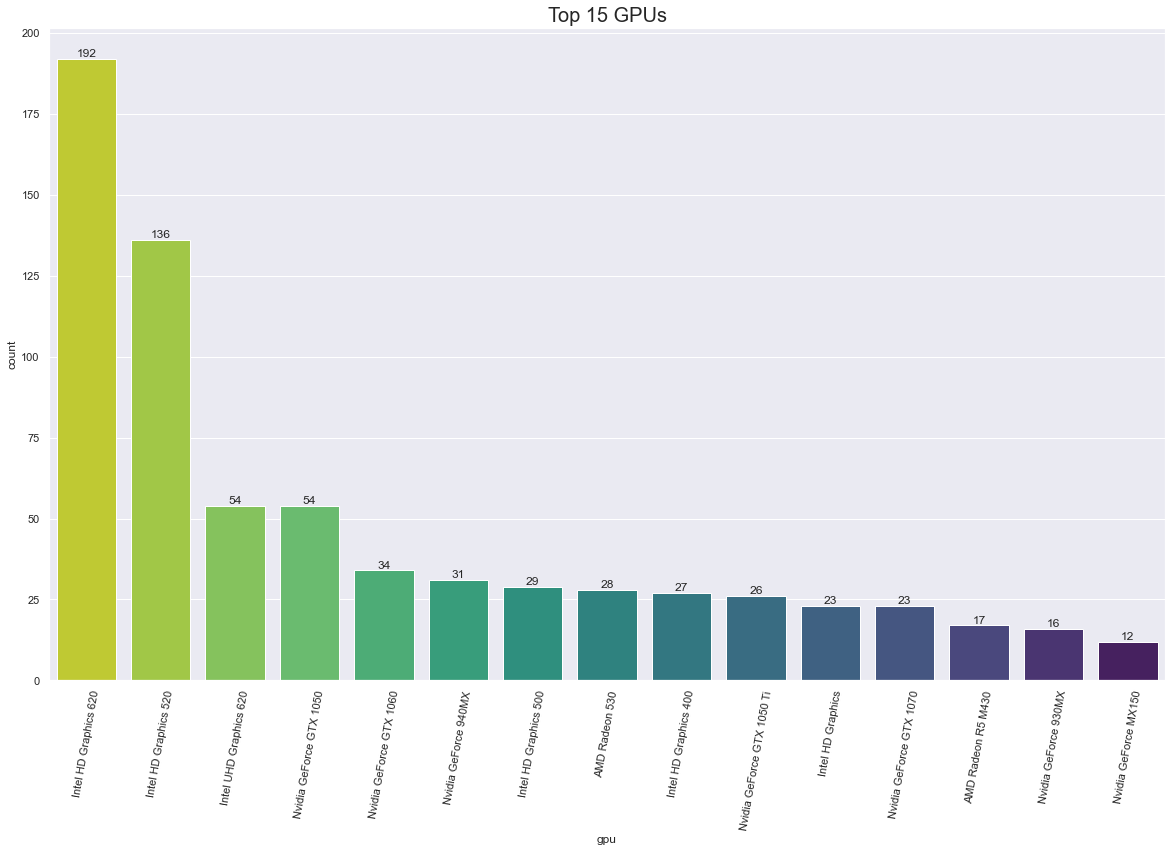

In [122]:
plt.figure(figsize = (20, 12))
ax = sns.countplot(x = 'gpu', data = df_clean[df_clean['gpu'].isin(gpu_list)], palette = 'viridis_r', order = gpu_list)
plt.xticks(rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Top 15 GPUs', fontsize = 20)
plt.show()

###### The 2 most common GPUs are Intel HD Graphics 620 and Intel UHD Graphics 520. These GPUs are integrated graphics cards that are commonly found in laptops. The next most common GPUs are Nvidia GeForce GTX 1060 and Nvidia GeForce 940MX, which are dedicated graphics cards that are used in gaming laptops.

#### Which are the top 15 most common GPUs?

In [123]:
cpu_list = df_clean['cpu'].value_counts().index[:15].tolist()

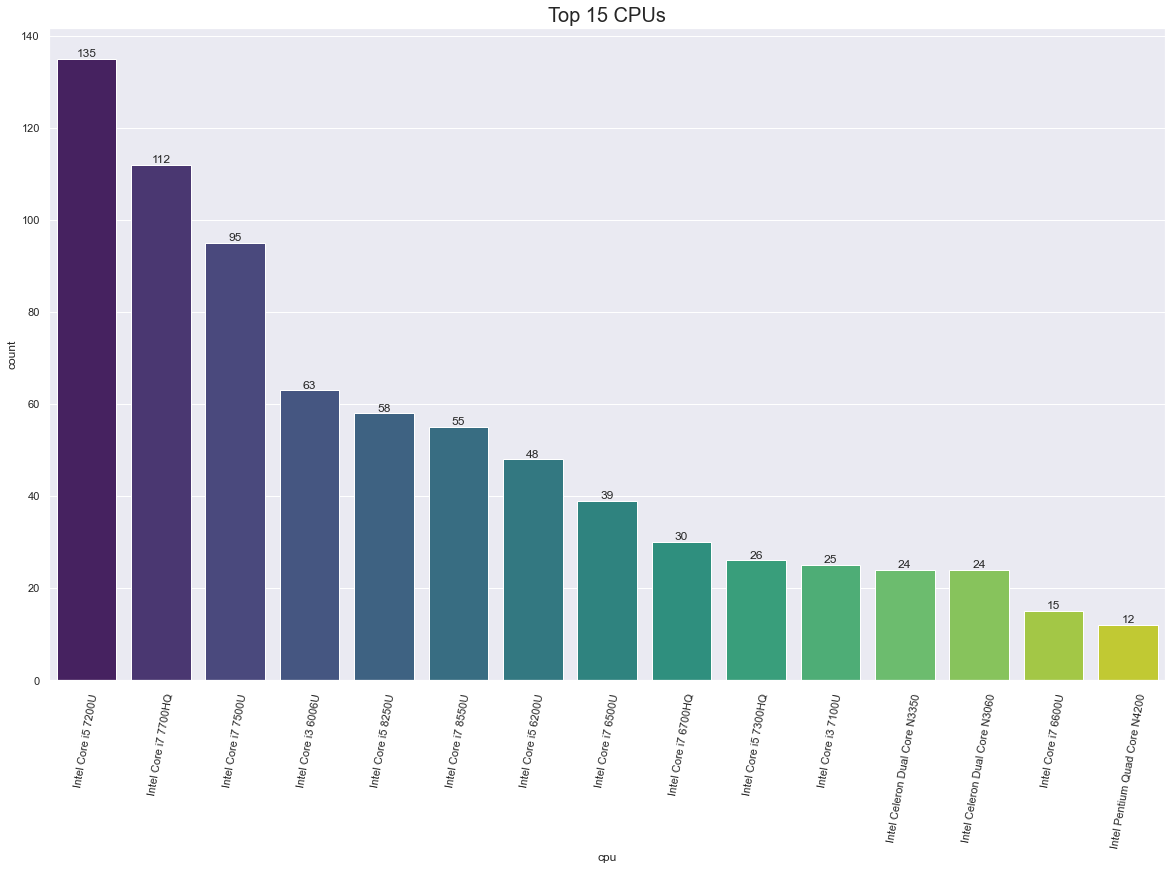

In [124]:
plt.figure(figsize = (20, 12))
ax = sns.countplot(x = 'cpu', data = df_clean[df_clean['cpu'].isin(cpu_list)], palette = 'viridis', order = cpu_list)
plt.xticks(rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Top 15 CPUs', fontsize = 20)
plt.show()

* All the top 15 most common CPUs are from Intel
* The most common CPU is the Intel Core i5-7200U, followed by the Intel Core i7-7700HQ
* The Intel Core i5-7200U is a dual-core processor with a base clock speed of 2.5 GHz and a turbo boost speed of 3.1 GHz. It is commonly found in mid-range laptops.
* Out of the 15 CPUs, 10 are series 'U' (low voltage) , 3 are series 'HQ' (high performance) 10 and 2 are Celerons (low-end).

#### What is the average price of laptops by company?

In [125]:
df_clean['manufacturer'].value_counts()

Dell        235
Lenovo      207
HP          198
Asus        122
Acer         79
MSI          42
Toshiba      32
Apple         9
Mediacom      6
Razer         5
Xiaomi        3
Chuwi         2
Vero          2
Samsung       2
LG            1
Fujitsu       1
Name: manufacturer, dtype: int64

In [126]:
company_list = df_clean['manufacturer'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

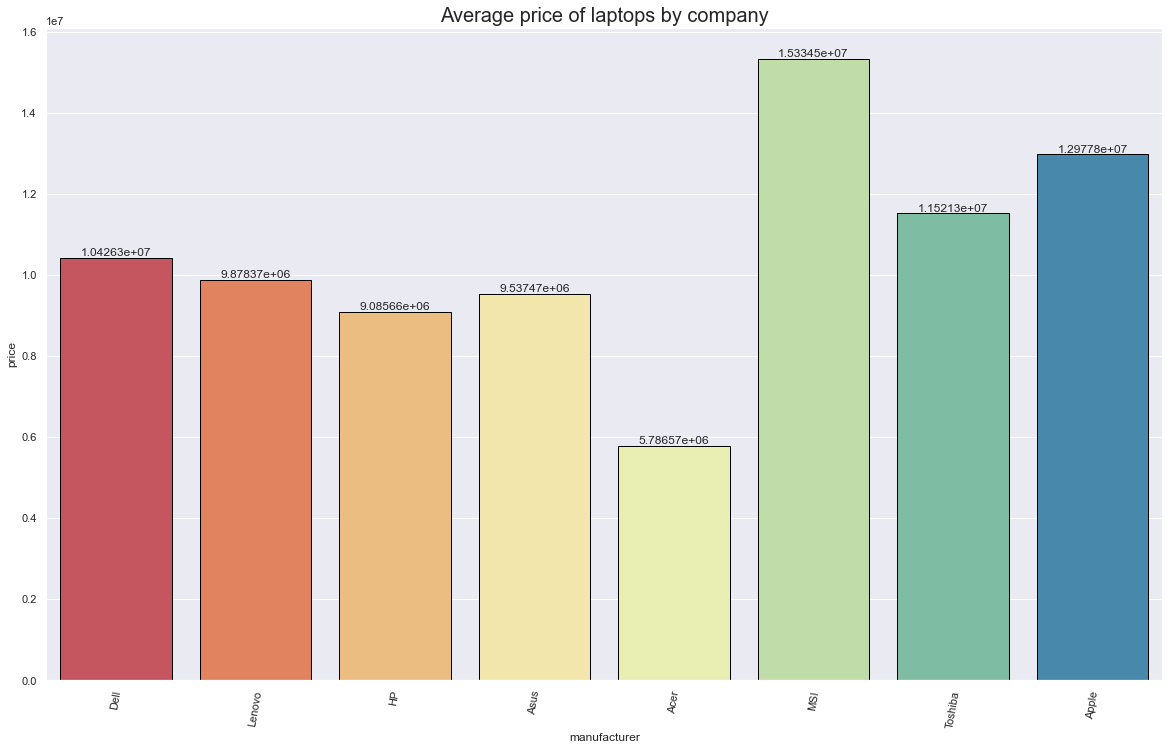

In [129]:
plt.figure(figsize = (20, 12))
ax = sns.barplot(x = 'manufacturer', y = 'price', data = df_clean[df_clean['manufacturer'].isin(company_list)], 
                palette = 'Spectral', order = company_list, ci = False, edgecolor = 'black')
plt.xticks(rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company', fontsize = 20)
plt.show()

###### - On Average MSI laptops are the expensive ones
###### - Apple laptops are the second most expensive ones and Toshiba's are 3rd
###### - Acer laptops are the cheapest ones
###### - Laptops from Dell, Lenovo, HP and ASUS have similar average prices

#### Correlation Matrix

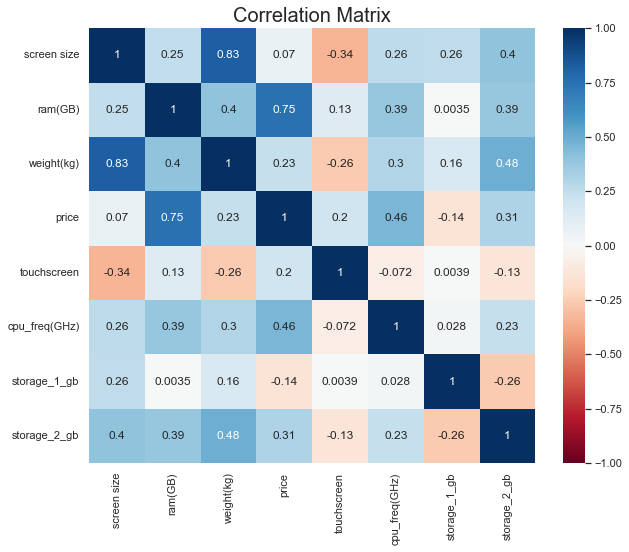

In [131]:
plt.figure(figsize = (10,8))
sns.heatmap(df_clean.corr(), cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

Insights from correlation matrix
- RAM and Price have a strong positive correlation (+0.75): more expensive laptops tend to have a higher price
- Weight and Screen size have a strong positive correlation (+0.83): laptops with bigger screens tend to be heavier
- CPU Freq has a quite moderate positive correlation with the price (+0.46)

### Data preparation for ML Modeling

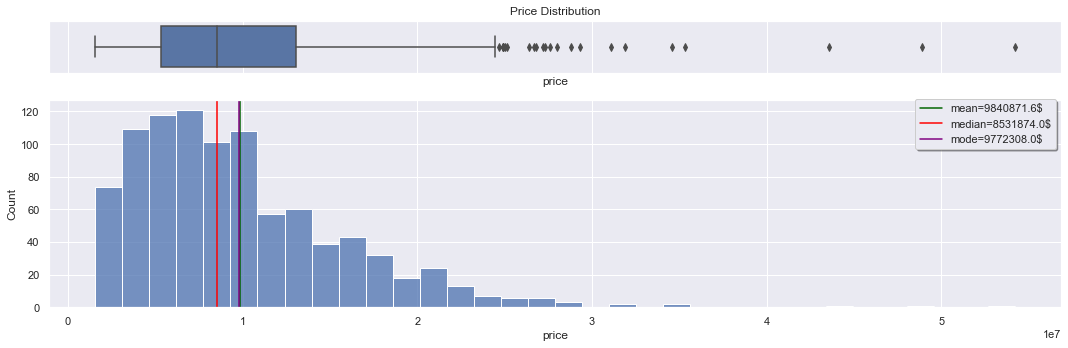

In [133]:
num_plot(df_clean, 'price', 'Price Distribution', '$')

In [134]:
df1 = df_clean.copy()

In [135]:
df1['price'] = np.log(df1['price'])
df_test['price'] = np.log(df_test['price'])

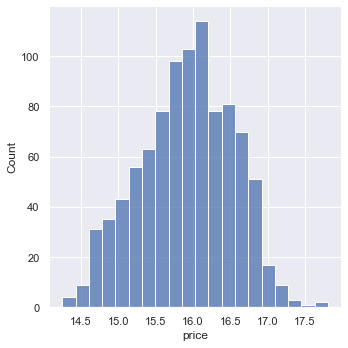

In [136]:
sns.displot(df1['price'])

In [137]:
df1 = df1.fillna('NaN')
df_test = df_test.fillna('NaN')

#### Categorical features encoding

In [138]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

In [139]:
cat_cols = ['manufacturer', 'model name', 'category', 'cpu', 'gpu', 'operating system', 'resolution',
            'screen_type', 'storage_1_type', 'storage_2_type', 'cpu_brand', 'gpu_brand']

In [140]:
# One hot encoding
print('Dataframe encoded by OHE dimension: ', pd.get_dummies(df1, columns = cat_cols, drop_first = True).shape)

Dataframe encoded by OHE dimension:  (946, 705)


In [141]:
# Label encoding
en = LabelEncoder()

for cols in cat_cols:
    df1[cols] = en.fit_transform(df1[cols])

for cols in cat_cols:
    df_train[cols] = en.fit_transform(df_train[cols])

print('Dataframe encoded by Label encoding dimension: ', df1.shape)

Dataframe encoded by Label encoding dimension:  (946, 21)


In [142]:
df1.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,8,368,4,14.0,50,8.0,42,4,10,1.32,...,3,0,0.0,2.5,256.0,3,0.0,2,1,1
1,9,237,1,17.3,66,8.0,63,4,10,2.70,...,3,2,0.0,2.8,256.0,3,0.0,2,1,2
2,4,456,4,13.3,55,8.0,49,4,10,1.21,...,8,0,1.0,1.6,128.0,3,0.0,2,1,1
3,4,207,1,15.6,66,16.0,63,4,10,2.65,...,3,0,0.0,2.8,128.0,3,1000.0,0,1,2
4,8,114,0,14.0,50,8.0,42,4,10,1.70,...,3,2,1.0,2.5,256.0,3,0.0,2,1,1


#### Data preparation

In [143]:
x_train = df1.drop('price', axis = 1).values
y_train = df1['price'].values

x_test = df_test.drop('price', axis = 1).values
y_test = df_test['price'].values

#### Train - Validation split

In [144]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = seed)